# This notebook calculates locations in Florida affected by a Tropical Cyclone

It reads ShapeFiles with Cartography maps from the US Census Bureau and the US National Hurricane Center

References:

https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

https://www.kaggle.com/alexisbcook/proximity-analysis

Created on 2021-May-2 by Edwin Campos

Last modification on 2021-June-3 by ecampos.phd@gmail.com

## Global Variables

In [1]:
# USA States at 1 : 20,000,000 scale (national)
LOCAL_SHAPES ='cb_2019_us_state_20m.zip'
URL_CENSUS = 'https://www2.census.gov/geo/tiger/GENZ2019/shp/'+LOCAL_SHAPES
#URL_CENSUS = 'https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_20m.zip'  
#LOCAL_SHAPES = 'getstateshape_shapes.zip'

TEMP_DIR = 'maps_temp'
N_POINTS = 100 # Number of random points within the US State
BUFFER_MILES = 20.0  # Minimum separation between policy location and tropical cyclone used to trigger polycy payout

In [2]:
CASE = 2
TC_NAME = ['HANNA', 'ETA', 'SALLY'][CASE]
TC_ID = ['al082020','al292020','al192020'][CASE] #al292020_best_track.zip

## Dependencies and Data Ingestion

In [3]:
import numpy as np

In [4]:
#import geopandas
try:
  import geopandas
except:
  ! pip install geopandas
  import time
  time.sleep(10) # Sleep for 10 seconds to give pip a chance to finish installing geopandas
  import geopandas
#! pip install geopandas

In [5]:
import requests
downloaded_obj = requests.get(URL_CENSUS)
# Save the zip file in the local directory
with open(LOCAL_SHAPES, 'wb') as file:
    file.write(downloaded_obj.content)

In [6]:
! pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile
ERROR: No matching distribution found for zipfile


In [7]:
#!conda install -y -c conda-forge unzip

from zipfile import ZipFile
with ZipFile(LOCAL_SHAPES, 'r') as zipObj:
    #listOfFileNames = zipObject.namelist()
    # Extract all the contents of zip file in directory 'temp'
   zipObj.extractall(TEMP_DIR)  

In [8]:
geodf = geopandas.read_file(TEMP_DIR)
geodf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,53,01779804,0400000US53,53,WA,Washington,00,172117954267,12549727444,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
1,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868701898,4922576715,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
2,46,01785534,0400000US46,46,SD,South Dakota,00,196346195316,3383460688,"POLYGON ((-104.05770 44.99743, -104.03914 44.9..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105823701267,10274036690,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131174192284,4593183334,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
5,05,00068085,0400000US05,05,AR,Arkansas,00,134776580080,2956395922,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
6,35,00897535,0400000US35,35,NM,New Mexico,00,314197253999,727781442,"POLYGON ((-109.04919 31.79655, -109.04830 32.0..."
7,48,01779801,0400000US48,48,TX,Texas,00,676668210823,18991880422,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
8,06,01779778,0400000US06,06,CA,California,00,403660088482,20305454540,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
9,21,01779786,0400000US21,21,KY,Kentucky,00,102282218059,2372611005,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."


In [9]:
# Subsets the GeoDataFrame
florida = geodf[geodf['NAME'] == 'Florida']

Text(0.5, 1.0, 'Map of Florida\n Original Coordinate Reference System')

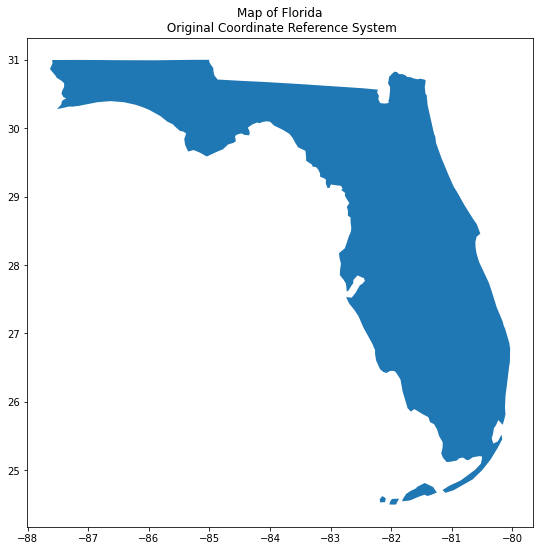

In [10]:
# Visualize map in Lat Lon coordinates
import matplotlib.pyplot as plt

ax = florida.plot(figsize=(12,9))#ax=ax)
ax.set_title("Map of Florida\n Original Coordinate Reference System")

## Convert to Lat, Lon coordinates

In [11]:
# Coordinate Reference Systems
print( florida.crs, type(geodf.crs) ) 

epsg:4269 <class 'pyproj.crs.crs.CRS'>


In [12]:
# Convert geometries into Latitude and Longitude
florida_geo = florida.to_crs(epsg=4269)
print('\n','LAT,LON PROJECTED:')
print(florida_geo)


 LAT,LON PROJECTED:
   STATEFP   STATENS     AFFGEOID GEOID STUSPS     NAME LSAD         ALAND  \
20      12  00294478  0400000US12    12     FL  Florida   00  138947364717   

         AWATER                                           geometry  
20  31362872853  MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...  


Text(0.5, 1.0, 'Map of Florida\n Lat,Lon Coordinate Reference System')

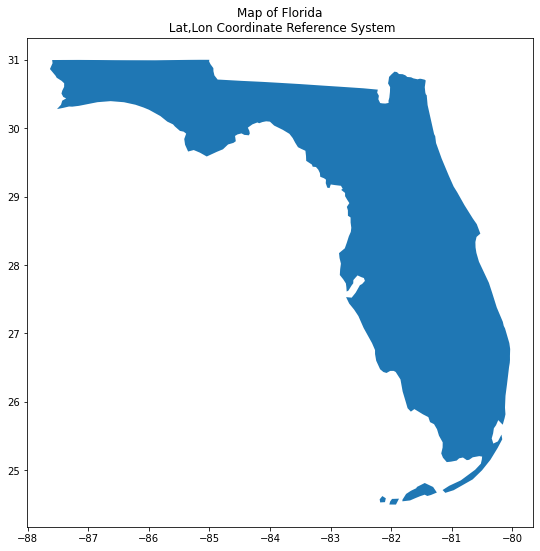

In [13]:
# Visualize map in Lat Lon coordinates
#import matplotlib.pyplot as plt

ax = florida_geo.plot(figsize=(12,9))#ax=ax)
ax.set_title("Map of Florida\n Lat,Lon Coordinate Reference System")

## Generate random points within a Shape
References: 
https://gis.stackexchange.com/questions/294394/randomly-sample-from-geopandas-dataframe-in-python
https://gis.stackexchange.com/a/207740/29431

In [14]:
from shapely.geometry import Point
import geopandas as gpd
import random

In [15]:
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point

In [16]:
#geodata = gpd.read_file("path/to/your/file.shp")

# generate 50 points within the first county polygon in geodata
#points = random_points_in_polygon(50, geodata.iloc[0].geometry)

# Generate N_POINTS points within the first county polygon in geodata
points = random_points_in_polygon(N_POINTS, florida.iloc[0].geometry)

# Coordinates of the first point
# print(points[0].x, points[0].y)

# print coordinates of all points
for i, point in enumerate(points):
    print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

Point 1: (-81.8939573342845,26.916987804538987)
Point 2: (-81.88108206303934,30.05784793531284)
Point 3: (-82.73849387681518,30.516633936354598)
Point 4: (-82.27678186973999,29.699840730072623)
Point 5: (-82.50336465043925,30.401280246732917)
Point 6: (-81.30100292915628,25.744096363968577)
Point 7: (-81.51756251275643,26.4820890104258)
Point 8: (-82.37198867655832,27.731096915624573)
Point 9: (-81.48623913133298,27.233886829361648)
Point 10: (-82.22054135067769,29.659807423603375)
Point 11: (-85.25048311273531,29.86367212361834)
Point 12: (-81.14252004599615,28.646772190188678)
Point 13: (-82.05937161863596,28.856514643737885)
Point 14: (-80.80163738502374,27.030029562112688)
Point 15: (-81.8606483469716,29.15243456345995)
Point 16: (-81.51816942373739,30.121035845509095)
Point 17: (-81.66355085115359,26.49641820661265)
Point 18: (-84.96727779719852,29.63590433841272)
Point 19: (-80.67352946700677,28.342490401964078)
Point 20: (-81.86088095952252,27.615553863234226)
Point 21: (-81.941

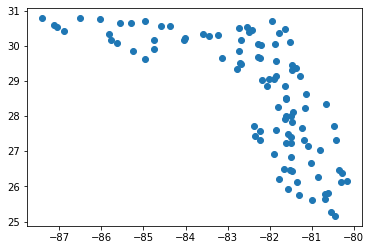

In [17]:
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

Text(0.5, 60.0, 'Longitude (deg)')

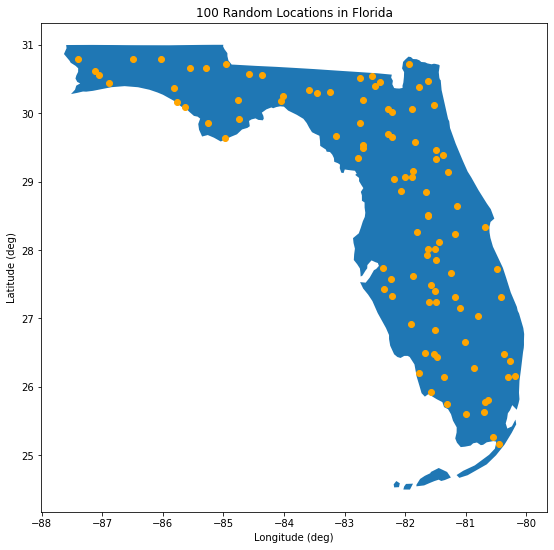

In [18]:
ax = florida.plot(figsize=(12,9))#ax=ax)
plt.scatter(xs, ys, color='orange')
#points.plot(legend=True, color='orange', ax=ax)
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')

In [19]:
# Create a GeoPandas dataframe with the random points
random_points_gdf = gpd.GeoDataFrame({'geometry': points}, 
                                    crs='EPSG:4326')  # points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84

In [20]:
# Create a column for too_close to tropical cyclone
# In column names avoid spaces
# There can be two types of Triggering Distances, short=20miles and long=40miles, indicate which one is the one that activates it.
random_points_gdf['triggering_distance_miles'] = BUFFER_MILES  # Specify Units
random_points_gdf['calculation_time_YYYY-MM-DD_HH-mm-ss_UTC'] = 'YYYY-MM-DD HH:mm:ss UTC' # Indicate it's Date and UTC Time, at which we analyse the Tropical Cyclone data and the policy positions
random_points_gdf['shortest_separation_miles'] = np.nan # Shortest distance between policy location and tropical cyclone track, in miles
random_points_gdf['triggered'] = False  # True if the 'Shortest Separation' is smaller than BUFFER_MILES
random_points_gdf['triggering_storm_number'] = 'None'  # Name of the Tropical Cyclone that triggered the policy payment process
random_points_gdf['triggering_storm_name_category'] = 'None'  # Saffir-Simpson Category of the Tropical Cyclone that triggered the policy payment process
random_points_gdf['triggering_time_YYYY-MM-DD_HH-mm-ss_UTC'] = 'YYYY-MM-DD HH:mm:ss UTC'  # Time at which the Tropical Cyclone was close enough to the policy location to trigger the policy payment process
random_points_gdf.index.rename('Policy ID', inplace=True)
random_points_gdf

,geometry,triggering_distance_miles,calculation_time_YYYY-MM-DD_HH-mm-ss_UTC,shortest_separation_miles,triggered,triggering_storm_number,triggering_storm_name_category,triggering_time_YYYY-MM-DD_HH-mm-ss_UTC
Policy ID,,,,,,,,
0,POINT (-81.89396 26.91699),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
1,POINT (-81.88108 30.05785),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
2,POINT (-82.73849 30.51663),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
3,POINT (-82.27678 29.69984),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
4,POINT (-82.50336 30.40128),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
...,...,...,...,...,...,...,...,...
95,POINT (-82.77699 29.34393),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
96,POINT (-81.56914 25.92790),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
97,POINT (-81.47561 26.43337),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC


In [21]:
# Generate a CSV file with the Policy Information
random_points_gdf.to_csv('./outputs/input_policies.csv')

# Tropical Cyclone case


In [22]:
TC_STRING = 'Hurricane '+TC_NAME+', Atlantic 2020 Season'
URL_NHC_SHAPES = 'https://www.nhc.noaa.gov/gis/best_track/'+TC_ID+'_best_track.zip' 
LOCAL_SHAPES = r'local_shapes.zip'

Ingesting NOAA-NHC Data in the Shapefile ESRI format

In [23]:
import requests
downloaded_obj = requests.get(URL_NHC_SHAPES)
# Save the zip file in the local directory
with open(LOCAL_SHAPES, 'wb') as file:
    file.write(downloaded_obj.content)

In [24]:
from zipfile import ZipFile
with ZipFile(LOCAL_SHAPES, 'r') as zipObj:
   # Extract all the contents of zip file in directory 'temp'
   zipObj.extractall('temp')


In [25]:
import glob
nhc_pts_files_list = glob.glob('temp/*_pts.shp')
print(nhc_pts_files_list)

['temp/AL192020_pts.shp']


In [26]:
nhc_gdf = geopandas.read_file(nhc_pts_files_list[0])

In [27]:
print(nhc_gdf.columns)
nhc_gdf.tail(12)

Index(['STORMNAME', 'DTG', 'YEAR', 'MONTH', 'DAY', 'HHMM', 'MSLP', 'BASIN',
       'STORMNUM', 'STORMTYPE', 'INTENSITY', 'SS', 'LAT', 'LON', 'geometry'],
      dtype='object')


,STORMNAME,DTG,YEAR,MONTH,DAY,HHMM,MSLP,BASIN,STORMNUM,STORMTYPE,INTENSITY,SS,LAT,LON,geometry
15,SALLY,2.020092e+09,2020.0,09,15.0,1200,982.0,al,19.0,HU,70.0,1.0,29.0,-88.1,POINT (-88.10000 29.00000)
16,SALLY,2.020092e+09,2020.0,09,15.0,1800,981.0,al,19.0,HU,70.0,1.0,29.3,-88.1,POINT (-88.10000 29.30000)
17,SALLY,2.020092e+09,2020.0,09,16.0,0000,975.0,al,19.0,HU,75.0,1.0,29.6,-88.0,POINT (-88.00000 29.60000)
18,SALLY,2.020092e+09,2020.0,09,16.0,0600,967.0,al,19.0,HU,95.0,2.0,29.9,-87.9,POINT (-87.90000 29.90000)
19,SALLY,2.020092e+09,2020.0,09,16.0,1200,967.0,al,19.0,HU,85.0,2.0,30.5,-87.6,POINT (-87.60000 30.50000)
20,SALLY,2.020092e+09,2020.0,09,16.0,1800,982.0,al,19.0,TS,60.0,0.0,31.1,-87.2,POINT (-87.20000 31.10000)
21,SALLY,2.020092e+09,2020.0,09,17.0,0000,994.0,al,19.0,TS,35.0,0.0,31.6,-86.7,POINT (-86.70000 31.60000)
22,SALLY,2.020092e+09,2020.0,09,17.0,0600,1000.0,al,19.0,TD,30.0,0.0,32.1,-86.1,POINT (-86.10000 32.10000)
23,SALLY,2.020092e+09,2020.0,09,17.0,1200,1003.0,al,19.0,EX,30.0,0.0,32.6,-85.2,POINT (-85.20000 32.60000)
24,SALLY,2.020092e+09,2020.0,09,17.0,1800,1004.0,al,19.0,EX,30.0,0.0,33.2,-83.8,POINT (-83.80000 33.20000)


In [28]:
nhc_gdf.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

Since CRS: EPSG:4035 is deprecated, we need to **change this CRS to 4047**

References: 

https://epsg.io/4035

https://epsg.io/4047

In [29]:
nhc_gdf = nhc_gdf.to_crs('EPSG:4047')

Text(0.5, 60.0, 'Longitude (deg)')

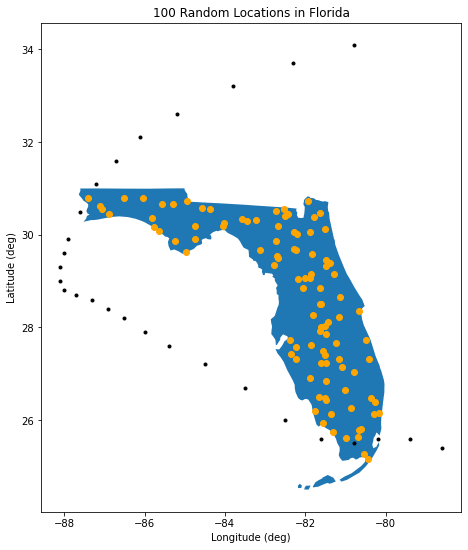

In [30]:
# Visualize data
ax = florida.plot(figsize=(12,9), zorder=0) # Remember that Florida uses crs: epsg=4269
#plt.scatter(xs, ys, color='orange')
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='orange', ax=ax, zorder=1)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='.',ax=ax, zorder=2) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')

In [31]:
#from shapely.geometry import Point

# tc_name = 'ETA'
# tc_dtg = 2.020111e+09
# tc_YYYY = 2020.0
# tc_MM = 11
# tc_DD = 12.0
# tc_hhmm = 1200
# tc_mslp = 1001.0
# tc_basin = 'al'
# tc_number = 29.0
# tc_type = 'TS'
# tc_intensity = 40.0
# tc_ss = 0.0
# tc_lon = 29.8
# tc_lat = -82.4

#tc_pnt = Point(tc_lat, tc_lon)
## If points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84
#tc_point_gdf = gpd.GeoDataFrame({'geometry': [tc_pnt]}, crs='EPSG:4326')

## Measuring distance:
To measure distances between points from two different GeoDataFrames, we first have to make sure that they use the same coordinate reference system (CRS). Thankfully, this is the case here, where both use EPSG 2272.


Check the CRS to see which units it uses (meters, feet, or something else). 

In this case, EPSG 2272 has units of feet. (If you like, you can check this  [here](https://epsg.io/2272)

In [32]:
print(random_points_gdf.crs, type(random_points_gdf.crs))
print(florida.crs, type(florida.crs) ) # 4269
print(nhc_gdf.crs, type(nhc_gdf.crs))
#print(tc_point_gdf.crs, type(tc_point_gdf.crs))

EPSG:4326 <class 'pyproj.crs.crs.CRS'>
epsg:4269 <class 'pyproj.crs.crs.CRS'>
EPSG:4047 <class 'pyproj.crs.crs.CRS'>


In [33]:
# Convert the point to the same CRS, EPSG:2272, which uses units of feet
random_points_gdf = random_points_gdf.to_crs('EPSG:2272') 
nhc_gdf = nhc_gdf.to_crs('EPSG:2272')

In [34]:
print(random_points_gdf.crs)
print(florida.crs)
print(nhc_gdf.crs)

EPSG:2272
epsg:4269
EPSG:2272


In [35]:
# Select one release incident in particular
tc_point = nhc_gdf.iloc[0]

In [36]:
random_points_gdf

,geometry,triggering_distance_miles,calculation_time_YYYY-MM-DD_HH-mm-ss_UTC,shortest_separation_miles,triggered,triggering_storm_number,triggering_storm_name_category,triggering_time_YYYY-MM-DD_HH-mm-ss_UTC
Policy ID,,,,,,,,
0,POINT (582579.320 -4529307.480),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
1,POINT (641406.265 -3364783.641),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
2,POINT (375796.791 -3181451.741),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
3,POINT (507615.777 -3490704.893),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
4,POINT (448503.337 -3228098.772),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
...,...,...,...,...,...,...,...,...
95,POINT (338862.278 -3613449.302),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
96,POINT (675154.485 -4903692.889),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC
97,POINT (714786.645 -4716037.781),20.0,YYYY-MM-DD HH:mm:ss UTC,NaN,False,None,None,YYYY-MM-DD HH:mm:ss UTC


In [37]:
tc_point

STORMNAME                                        NINETEEN
DTG                                           2.02009e+09
YEAR                                                 2020
MONTH                                                  09
DAY                                                    11
HHMM                                                 1800
MSLP                                                 1007
BASIN                                                  al
STORMNUM                                               19
STORMTYPE                                              TD
INTENSITY                                              30
SS                                                      0
LAT                                                  25.4
LON                                                 -78.6
geometry     POINT (1678657.773534822 -5128240.982444993)
Name: 0, dtype: object

## Update the Parachute database

> Use Sasha's code

In [38]:
# TBD

# Calculate the distance (in feet) between a Tropical Cyclone point and every random policy location.

**1 mile = 5280 feet**

In [39]:
# Select one particular position of the tropical cyclone
#tc_point_gdf = tc_points_all.iloc[3]

# Measure distance (in feet) from random points to hurricane position
distances_ft = random_points_gdf.geometry.distance(tc_point.geometry)
distances_miles = distances_ft/5280.0
distances_miles

Policy ID
0     236.561243
1     387.479472
2     443.660511
3     381.282684
4     428.709419
         ...    
95    383.008953
96    194.757454
97    198.544028
98    263.185653
99    560.875186
Length: 100, dtype: float64

## Creating a buffer
If we want to understand all points on a map that are some radius away from a point, the simplest way is to create a buffer.

The code cell below creates a GeoSeries twenty_mile_buffer containing 12 different Polygon objects. Each polygon is a buffer of 20 miles (or, 20*5280 feet) around a different random points.

In [40]:
twenty_mile_buffer = random_points_gdf.geometry.buffer(20*5280)
twenty_mile_buffer.head()

Policy ID
0    POLYGON ((688179.320 -4529307.480, 687670.827 ...
1    POLYGON ((747006.265 -3364783.641, 746497.772 ...
2    POLYGON ((481396.791 -3181451.741, 480888.298 ...
3    POLYGON ((613215.777 -3490704.893, 612707.284 ...
4    POLYGON ((554103.337 -3228098.772, 553594.844 ...
dtype: geometry

(-89.0, -79.0)

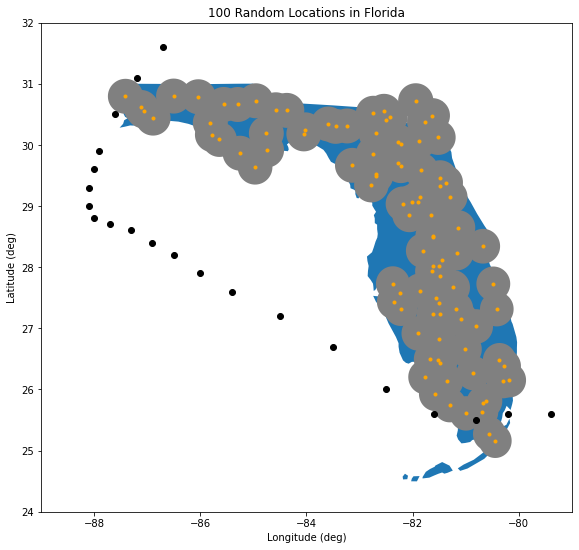

In [41]:
# Visualize
ax = florida.plot(figsize=(12,9), zorder=0)
twenty_mile_buffer.to_crs(epsg=4269).plot(color='gray', ax=ax, zorder=1) # Make sure to match to the CRS of the ax, i.e. florida geodataframe
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='orange', marker='.', ax=ax, zorder=2)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
#plt.scatter(xs, ys, color='orange')
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='o', ax=ax, zorder=3) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
#points.plot(legend=True, color='orange', ax=ax)
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.ylim(24,32)
plt.xlim(-89,-79)

In [42]:
plt.savefig('GetPlacesAffectedByCyclone_map.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Read file with Tropical Cyclone track as a Polyline

In [43]:
nhc_lin_files_list = glob.glob('temp/*_lin.shp')
print(nhc_lin_files_list)

['temp/AL192020_lin.shp']


In [44]:
nhc_lin_gdf = geopandas.read_file(nhc_lin_files_list[0])
nhc_lin_gdf

,STORMNUM,STORMTYPE,SS,geometry
0,19.0,TD,0.0,"LINESTRING (-78.60000 25.40000, -79.40000 25.6..."
1,19.0,TS,0.0,"LINESTRING (-80.80000 25.50000, -81.60000 25.6..."
2,19.0,HU,1.0,"LINESTRING (-86.90000 28.40000, -87.30000 28.6..."
3,19.0,HU,2.0,"LINESTRING (-87.90000 29.90000, -87.60000 30.5..."
4,19.0,TS,0.0,"LINESTRING (-87.20000 31.10000, -86.70000 31.6..."
5,19.0,TD,0.0,"LINESTRING (-86.10000 32.10000, -85.20000 32.6..."
6,19.0,TD,0.0,"LINESTRING (-85.20000 32.60000, -83.80000 33.2..."


Note that the polyline is divided in 7 segments 

In [45]:
nhc_lin_gdf.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

Since CRS: EPSG:4035 is deprecated, we need to **change this CRS to 4047**

References: 

https://epsg.io/4035

https://epsg.io/4047

In [46]:
nhc_lin_gdf = nhc_lin_gdf.to_crs('EPSG:4047')

In [47]:
# Selecting first 4 segments of the Polyline
#nhc_lin_gdf = nhc_lin_gdf.iloc[0:4]

Text(0.5, 60.0, 'Longitude (deg)')

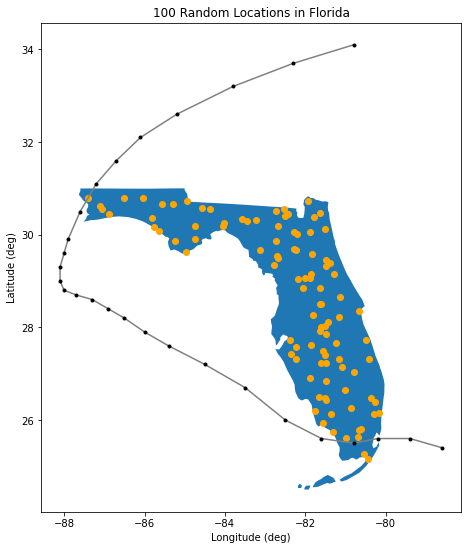

In [48]:
# Visualize data
ax = florida.plot(figsize=(12,9), zorder=0) # Remember that Florida uses crs: epsg=4269
#plt.scatter(xs, ys, color='orange')
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='orange', ax=ax, zorder=1)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='.',ax=ax, zorder=3) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_lin_gdf.to_crs(epsg=4269).plot(legend=True, # Make sure to match to the CRS of the ax, i.e. florida geodataframe
                                   color='gray', 
                                   ax=ax, 
                                   zorder=2) 

ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')

In [49]:
# Point 87: (-82.59995821412974,30.492239479765672)

## Generate a Polyline from the Tropical Cyclone track points

Reference: http://ryan-m-cooper.com/blog/gps-points-to-line-segments.html

    from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame
    import pandas as pd

    # function that takes two sets of XY coordinates from a GeoDataFrame and adds them to a shapely LineString() constructor. Returns a DataFrame.
    def make_lines(gdf, df_out, i, geometry = 'geometry'):
        geom0 = gdf.loc[i][geometry]
        geom1 = gdf.loc[i + 1][geometry]

        start, end = [(geom0.x, geom0.y), (geom1.x, geom1.y)]
        line = LineString([start, end])

        # Create a DataFrame to hold record
        data = {'id': i,
                'geometry': [line]}
        df_line = pd.DataFrame(data, columns = ['id', 'geometry'])

        # Add record DataFrame of compiled records
        df_out = pd.concat([df_out, df_line])
        return df_out

    # Loop through a GeoDataFrame, passing consecutive XY coordinate pairs to make_lines()

    # initialize an output DataFrame

    nhc_lin_gdf = pd.DataFrame(columns = ['id', 'geometry'])

    # Loop through each row of the input point GeoDataFrame
    x = 0
    while x < len(gdf) - 1:
        nhc_lin_gdf = make_lines(nhc_gdf, nhc_lin_gdf, x)
        x = x + 1

    nhc_lin_gdf.head()

## Calculate distance from Polyline (of Tropical Cyclone track) and Points (of Policies Random Locations)

The distance between any two features is calculated as the shortest separation between them

Reference: https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/how-near-analysis-works.htm



In [50]:
print(nhc_lin_gdf.crs)
print(random_points_gdf.crs)

EPSG:4047
EPSG:2272


In [51]:
# Since nhc_lin_gdf.crs is EPSG:4047 , we need to convert it to the same random_points_gdf.crs, EPSG:2272, which uses units of feet
#random_points_gdf = random_points_gdf.to_crs('EPSG:2272') 
nhc_lin_gdf = nhc_lin_gdf.to_crs('EPSG:2272')

In [52]:
len(random_points_gdf)

100

In [53]:
# Select one particular position in random_points_gdf
for indx in range(len(random_points_gdf)):
    print('***********',indx,'***********')
    point_gser = random_points_gdf.iloc[indx]  # Geoseries
    #print(point_gser)
    # Measure distance (in feet) from random points to hurricane position
    #separation_point2track_ft = point_gser.geometry.distance(nhc_lin_gdf.geometry)#, align=True)
    # Separation at each segment of the Polyline
    separation_point2track_ft = nhc_lin_gdf.geometry.distance(point_gser.geometry)#, align=True) 
    #print('separation_point2track_ft=',separation_point2track_ft)
    #print('type(separation_point2track_ft)=',type(separation_point2track_ft))
    
    # Minimum separation between all segments of the Polyline and the point
    indx_min_separation = separation_point2track_ft.idxmin() # For a Pandas Series
    # For a list use indx_min_separation = separation_point2track_ft.index(min(separation_point2track_ft))
    #print('indx_min_separation =',indx_min_separation)
    min_separation_point2track_ft = min(separation_point2track_ft)
    min_separation_point2track_miles = min_separation_point2track_ft/5280.0
    random_points_gdf['shortest_separation_miles'].iloc[indx] = np.nanmin([min_separation_point2track_miles, 
                                                                     random_points_gdf['shortest_separation_miles'].iloc[indx] 
                                                                    ])
    #if min_separation_point2track_miles <= BUFFER_MILES:
    if min_separation_point2track_miles <= random_points_gdf['triggering_distance_miles'].iloc[indx] :
        #print(point_gser)
        random_points_gdf['triggered'].iloc[indx] = True
        print( random_points_gdf.to_crs('EPSG:4047').iloc[indx] )    
        print('min_separation_point2track_miles=', min_separation_point2track_miles)
        random_points_gdf['triggering_storm_number'].iloc[indx] = nhc_lin_gdf['STORMNUM'].iloc[indx_min_separation]  # Name of the Tropical Cyclone that triggered the policy payment process
        random_points_gdf['triggering_storm_name_category'].iloc[indx] = nhc_lin_gdf['SS'].iloc[indx_min_separation]  # Saffir-Simpson Category of the Tropical Cyclone that triggered the policy payment process


##---
##random_points_gdf['triggering_distance_miles'] = BUFFER_MILES  # Specify Units
#random_points_gdf['calculation_time_YYYY-MM-DD_HH-mm-ss_UTC'] = 'YYYY-MM-DD HH:mm:ss UTC' # Indicate it's Date and UTC Time, at which we analyse the Tropical Cyclone data and the policy positions
##random_points_gdf['shortest_separation_miles'] = np.nan # Shortest distance between policy location and tropical cyclone track, in miles
##random_points_gdf['triggered'] = False  # True if the 'shortest_separation_miles' is smaller than BUFFER_MILES
##random_points_gdf['triggering_storm_name'] = 'None'  # Name of the Tropical Cyclone that triggered the policy payment process
##random_points_gdf['triggering_storm_name_category'] = 'None'  # Saffir-Simpson Category of the Tropical Cyclone that triggered the policy payment process
##random_points_gdf['triggering_time_YYYY-MM-DD_HH-mm-ss_UTC'] = 'YYYY-MM-DD HH:mm:ss UTC'  # Time at which the Tropical Cyclone was close enough to the policy location to trigger the policy payment process
##random_points_gdf.index.rename('Policy ID', inplace=True)


*********** 0 ***********
*********** 1 ***********
*********** 2 ***********
*********** 3 ***********
*********** 4 ***********
*********** 5 ***********


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


geometry                                    POINT (-81.30100292915628 25.74409636396785)
triggering_distance_miles                                                             20
calculation_time_YYYY-MM-DD_HH-mm-ss_UTC                         YYYY-MM-DD HH:mm:ss UTC
shortest_separation_miles                                                        12.7153
triggered                                                                           True
triggering_storm_number                                                             None
triggering_storm_name_category                                                      None
triggering_time_YYYY-MM-DD_HH-mm-ss_UTC                          YYYY-MM-DD HH:mm:ss UTC
Name: 5, dtype: object
min_separation_point2track_miles= 12.715268570055253
*********** 6 ***********
*********** 7 ***********
*********** 8 ***********
*********** 9 ***********
*********** 10 ***********
*********** 11 ***********
*********** 12 ***********
*********** 13 ***********


## List which of the policies are triggered
Update Parachute database

In [54]:
random_points_gdf[random_points_gdf['triggered'] == True]

,geometry,triggering_distance_miles,calculation_time_YYYY-MM-DD_HH-mm-ss_UTC,shortest_separation_miles,triggered,triggering_storm_number,triggering_storm_name_category,triggering_time_YYYY-MM-DD_HH-mm-ss_UTC
Policy ID,,,,,,,,
5,POINT (763137.407 -4976307.881),20.0,YYYY-MM-DD HH:mm:ss UTC,12.715269,True,19,0,YYYY-MM-DD HH:mm:ss UTC
42,POINT (994370.757 -4959978.405),20.0,YYYY-MM-DD HH:mm:ss UTC,19.552160,True,19,0,YYYY-MM-DD HH:mm:ss UTC
43,POINT (865472.761 -5030945.122),20.0,YYYY-MM-DD HH:mm:ss UTC,5.920674,True,19,0,YYYY-MM-DD HH:mm:ss UTC
53,POINT (1010962.555 -5162102.389),20.0,YYYY-MM-DD HH:mm:ss UTC,18.767173,True,19,0,YYYY-MM-DD HH:mm:ss UTC
55,POINT (966719.739 -5025426.855),20.0,YYYY-MM-DD HH:mm:ss UTC,8.082325,True,19,0,YYYY-MM-DD HH:mm:ss UTC
66,POINT (-1099274.850 -2956337.283),20.0,YYYY-MM-DD HH:mm:ss UTC,0.134800,True,19,2,YYYY-MM-DD HH:mm:ss UTC
88,POINT (975429.307 -4971383.972),20.0,YYYY-MM-DD HH:mm:ss UTC,17.954521,True,19,0,YYYY-MM-DD HH:mm:ss UTC


In [55]:
# Generate a CSV file with the Policy Information
random_points_gdf.to_csv('./outputs/output_policies.csv')

In [56]:
triggered_random_points_gdf = random_points_gdf[random_points_gdf['triggered'] == True]
print('triggered_random_points_gdf:', triggered_random_points_gdf)

triggered_random_points_gdf:                                     geometry  triggering_distance_miles  \
Policy ID                                                                 
5            POINT (763137.407 -4976307.881)                       20.0   
42           POINT (994370.757 -4959978.405)                       20.0   
43           POINT (865472.761 -5030945.122)                       20.0   
53          POINT (1010962.555 -5162102.389)                       20.0   
55           POINT (966719.739 -5025426.855)                       20.0   
66         POINT (-1099274.850 -2956337.283)                       20.0   
88           POINT (975429.307 -4971383.972)                       20.0   

          calculation_time_YYYY-MM-DD_HH-mm-ss_UTC  shortest_separation_miles  \
Policy ID                                                                       
5                          YYYY-MM-DD HH:mm:ss UTC                  12.715269   
42                         YYYY-MM-DD HH:mm:ss UTC  

Text(0.5, 60.0, 'Longitude (deg)')

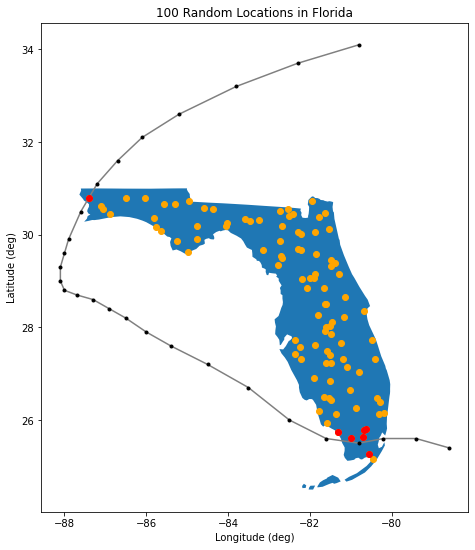

In [57]:
# Visualize data
ax = florida.plot(figsize=(12,9), zorder=0) # Remember that Florida uses crs: epsg=4269
#plt.scatter(xs, ys, color='orange')
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='orange', ax=ax, zorder=1)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='.',ax=ax, zorder=3) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_lin_gdf.to_crs(epsg=4269).plot(legend=True, # Make sure to match to the CRS of the ax, i.e. florida geodataframe
                                   color='gray', 
                                   ax=ax, 
                                   zorder=2) 
triggered_random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='red', ax=ax, zorder=4) 

ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')